# TRAIN BASICS REGRESSOR MODELS
The goal is train regressor models and save the pkl with the models.
In the future notebooks with the datasets and the models, these will be evaluated


### OBS: all the models loaded are the models that can be used in gurobi-py (this codes are generated to train models that the ds can undertand completly its behavior to add as constraint in optimization model)

SOURCES: https://gurobi-machinelearning.readthedocs.io/en/stable/auto_generated/gurobi_ml.sklearn.gradient_boosting_regressor.html

- Linear Regression (Linear Regression, Ridge, Lasso)
  
- Decission Tree
  
- Gradient Boosting Regressor

- Random Forest
  
- Xtreme Gradient Boosting
  
- Neural Network - Multi layer Perceptron


### OBS: all the models trained doesn't have feature eng, for example polinomial features

### OBS: the models are saved in folder "basic" to identify that they are the basic models

## RUN
Train each model independiently (some models with different hp) and save each model in one folder (artifacts/models)

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LinearRegression # lr
from sklearn.linear_model import Ridge # ridge
from sklearn.linear_model import Lasso # lasso
from sklearn.tree import DecisionTreeRegressor # tree
from sklearn.ensemble import GradientBoostingRegressor #gb
from sklearn.ensemble import RandomForestRegressor #rf
from xgboost import XGBRegressor # xgb
from  sklearn.neural_network import MLPRegressor # mlp

# plot trees
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import subprocess
import xgboost as xgb

### 0. Global params

In [2]:
# define folder where the models were saved. There are the same models accepted by gurobi but the feature eng changed
folder_models = 'basic'

### 1. load data

In [3]:
### DEFINE LIST FEARTURES - TARGET (order data to have the same order in the features always)
list_features = ['AveOccup', 'Latitude', 'Population', 'AveBedrms', 'HouseAge', 'Longitude', 'AveRooms', 'MedInc']

In [4]:
### LOAD DATA
X_train = pd.read_pickle('artifacts/data/X_train.pkl')
X_test = pd.read_pickle('artifacts/data/X_test.pkl')
y_train = pd.read_pickle('artifacts/data/y_train.pkl')
y_test = pd.read_pickle('artifacts/data/y_test.pkl')

In [5]:
print('shape data')
print('\n\n TRAIN')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('\n\n TEST')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

shape data


 TRAIN
X_train:  (14540, 8)
y_train:  (14540, 1)


 TEST
X_test:  (3636, 8)
y_test:  (3636, 1)


### 2.1 lr

In [6]:
# train
lr = LinearRegression()
lr.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/lr.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(lr, f)

### 2.2 Ridge
- L2
- Conserve the features. Coeficients not zero. Use all the features

In [7]:
# train
ridge = Ridge()
ridge.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/ridge.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(ridge, f)

### 2.3 Lasso
- L1
- Trend to transform the coeficients to zero. Conserve only the most important features

In [8]:
# train
lasso = Lasso()
lasso.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/lasso.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(lasso, f)

### 3.1. tree_simple

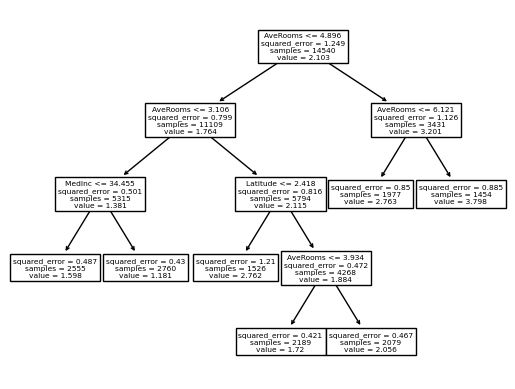

In [9]:
# train
tree_simple = DecisionTreeRegressor(random_state = 42,
                                   min_samples_split = 0.2,
                                    min_samples_leaf = 0.1,
                                   #max_depth = 2
                                   )
tree_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/tree_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(tree_simple, f)


# show tree trained
plot_tree(tree_simple,
         feature_names = list_features)
plt.savefig(f'artifacts/models_fig/{folder_models}/tree_simple.png', dpi = 300)

### 3.2. tree_default

In [10]:
# train
tree_default = DecisionTreeRegressor(random_state = 42)
tree_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/tree_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(tree_default, f)


# show tree trained
#plot_tree(tree_default)

### 4.1 rf_simple

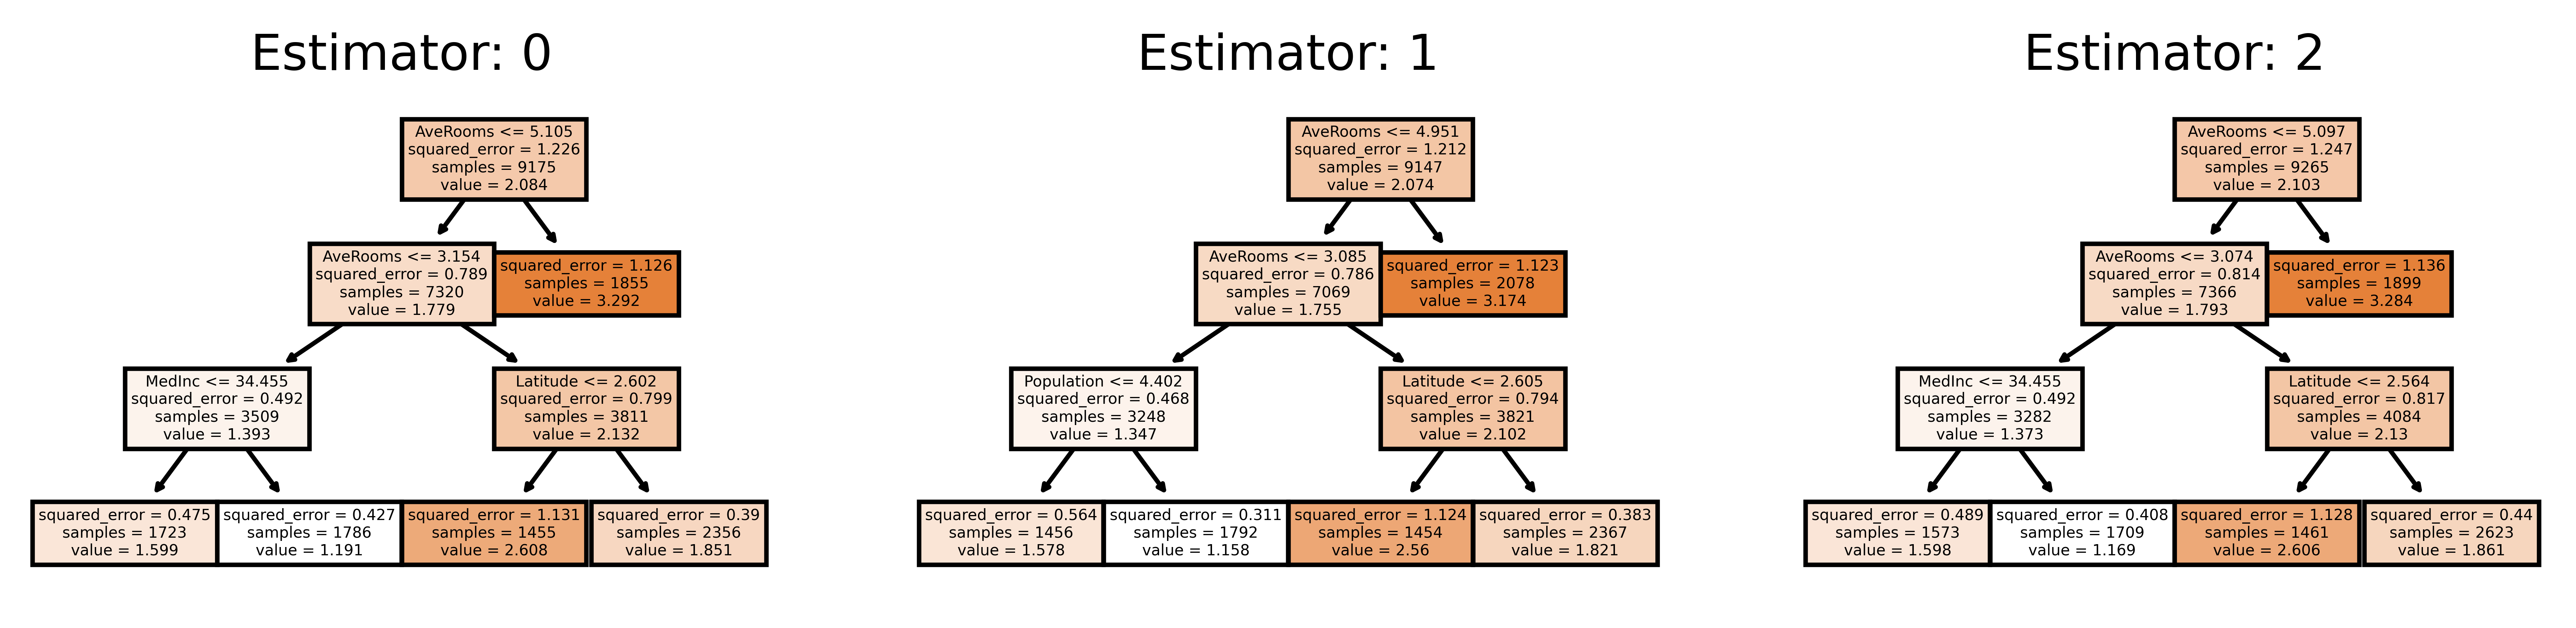

In [11]:
# train
param_n_trees = 3
rf_simple = RandomForestRegressor(n_estimators = param_n_trees,
                                  random_state = 42,
                                 min_samples_split = 0.2,
                                    min_samples_leaf = 0.1)
                                   #max_depth = 2)
rf_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/rf_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(rf_simple, f)


# show tree trained
fig, axes = plt.subplots(nrows = 1, ncols = param_n_trees, figsize = (10,2), dpi=900)
for index in range(0, param_n_trees):
    plot_tree(rf_simple.estimators_[index],
                    feature_names = list_features,
                   filled = True,
                   ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(f'artifacts/models_fig/{folder_models}/rf_simple.png', dpi = 300)

### 4.2 rf_default

In [12]:
# train
rf_default = RandomForestRegressor(random_state = 42)
rf_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/rf_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(rf_default, f)

### 5.1. gb_simple

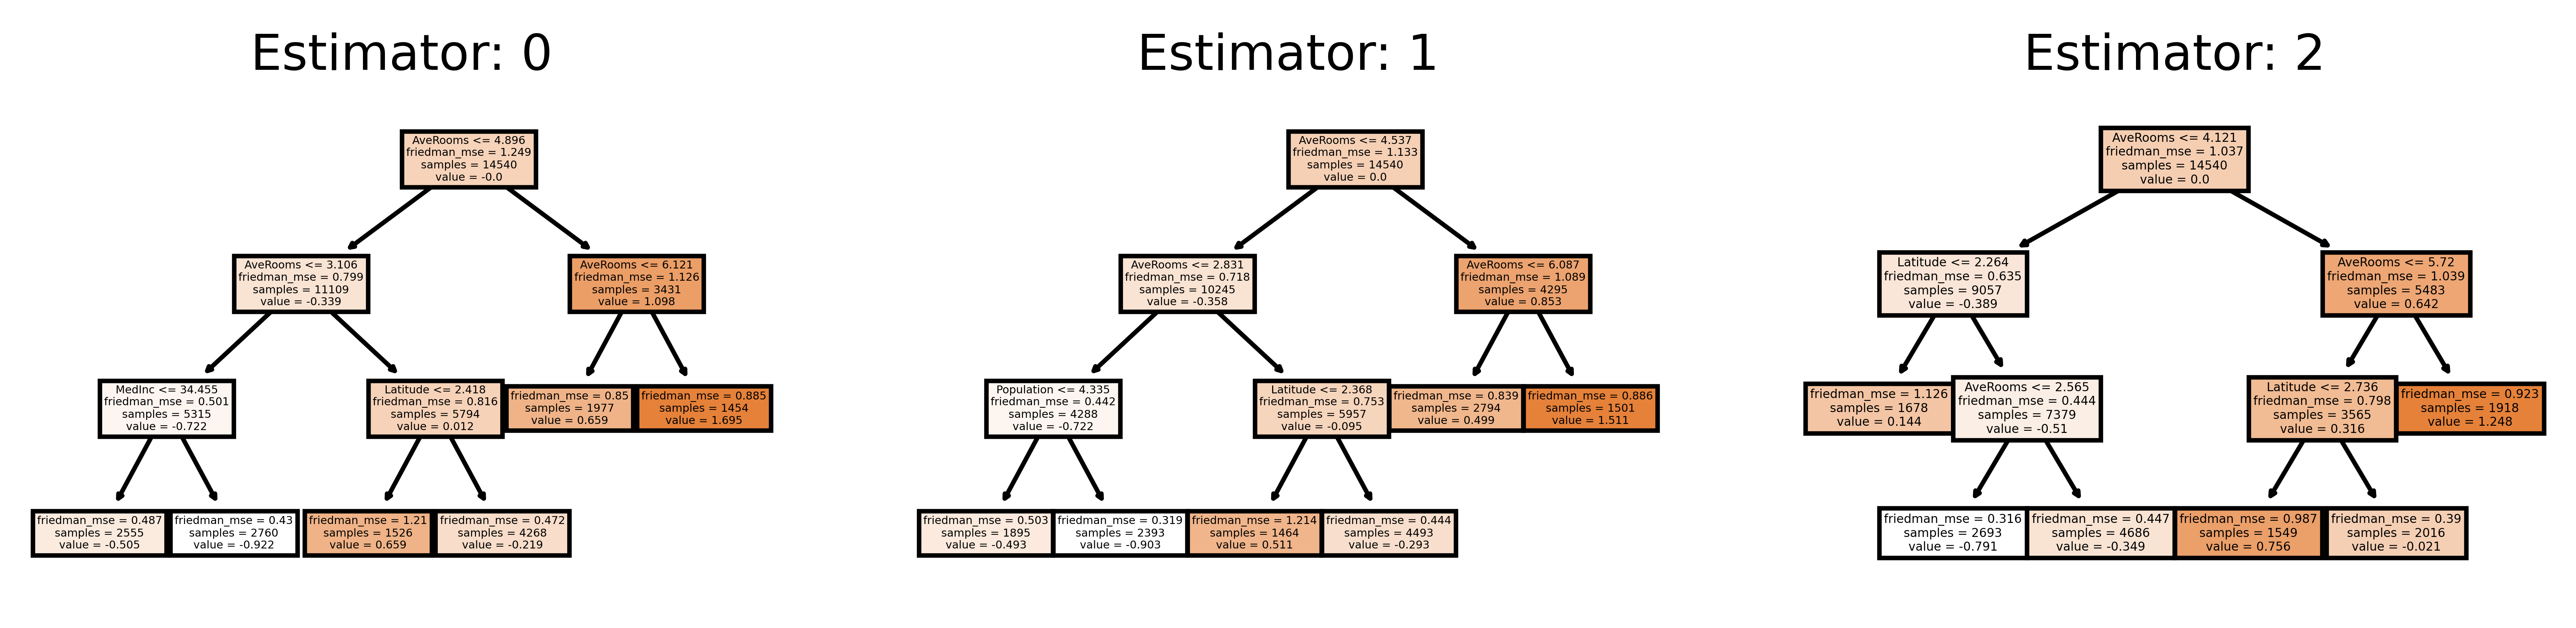

In [13]:
# train
param_n_estimators = 3
gb_simple = GradientBoostingRegressor(random_state=0,
                                     n_estimators = param_n_estimators,
                                      min_samples_split = 0.2,
                                    min_samples_leaf = 0.1,
                                    #max_depth = 2)
                                     )
gb_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/gb_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(gb_simple, f)


# show tree trained
fig, axes = plt.subplots(nrows = 1, ncols = param_n_estimators, figsize = (10,2), dpi=900)
for index in range(0, param_n_estimators):
    plot_tree(gb_simple[index][0],
                    feature_names = list_features,
                   filled = True,
                   ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(f'artifacts/models_fig/{folder_models}/gb_simple.png', dpi = 300)

### 5.2 gb_default

In [14]:
# train
gb_default = GradientBoostingRegressor(random_state = 42)
gb_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/gb_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(gb_default, f)

### 6.1 xgb_simple

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

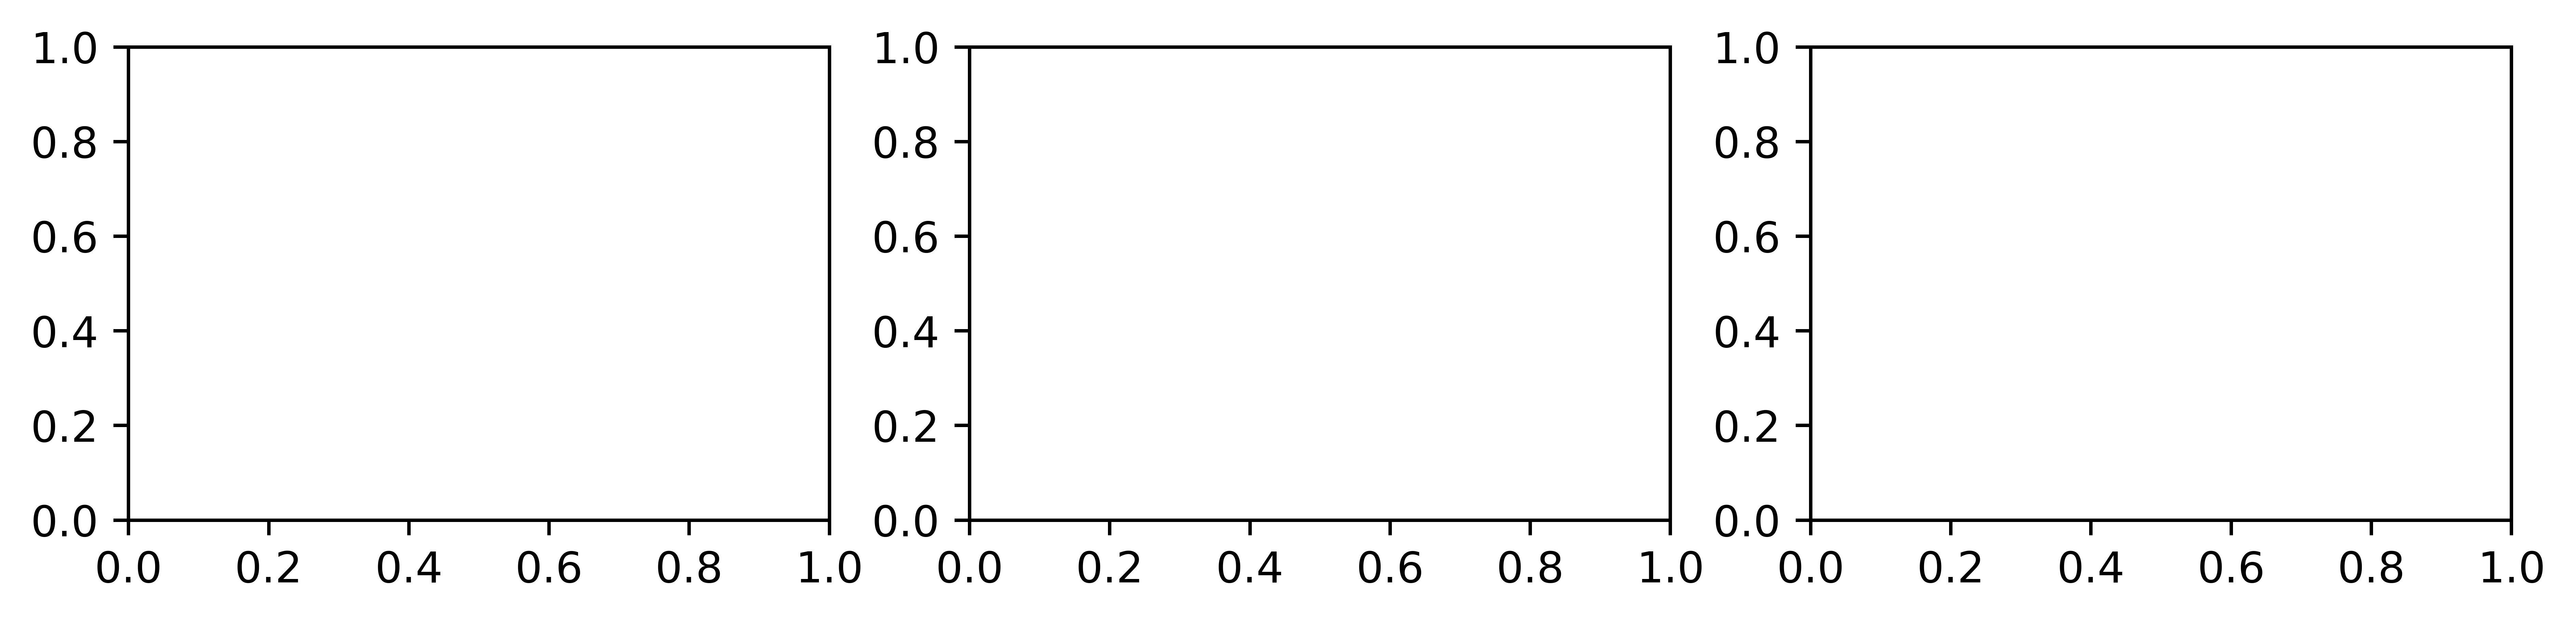

In [15]:
# train
param_n_estimators = 3
xgb_simple = XGBRegressor(random_state = 42,
                                     n_estimators = param_n_estimators,
                                      min_samples_split = 0.2,
                                    min_samples_leaf = 0.1,
                                    #max_depth = 2)
                                     )
xgb_simple.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/xgb_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(xgb_simple, f)


# show tree trained
# path graphviz
graphviz_path = 'D:/Graphviz/bin'
os.environ['PATH'] = f"{graphviz_path};{os.environ['PATH']}"

# show
fig, axes = plt.subplots(nrows = 1, ncols = param_n_estimators, figsize = (10,2), dpi=900)
for index in range(0, param_n_estimators):
    #axes[index] = xgb.plot_tree(xgb_simple, num_trees = index, fill = True)
    xgb.plot_tree(xgb_simple, num_trees = index, fill = True, ax=axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig(f'artifacts/models_fig/{folder_models}/xgb_simple.png', dpi = 1300)

### 6.2 xgb_default

In [16]:
# train
xgb_default = XGBRegressor(random_state = 42)
xgb_default.fit(X_train, y_train)


# save
path_model = f'artifacts/models/{folder_models}/xgb_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(xgb_default, f)

### 7.1 mlp_simple

In [17]:
# train
mlp_simple = MLPRegressor(random_state = 42, max_iter=500, hidden_layer_sizes = [5, 1])
mlp_simple.fit(X_train, y_train)

# save
path_model = f'artifacts/models/{folder_models}/mlp_simple.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(mlp_simple, f)

### 7.2 mlp_default

In [18]:
# train
mlp_default = MLPRegressor(random_state = 42, max_iter=500)
mlp_default.fit(X_train, y_train)

# save
path_model = f'artifacts/models/{folder_models}/mlp_default.pkl'
with open(path_model, 'wb') as f:
    pickle.dump(mlp_default, f)